<a href="https://colab.research.google.com/github/stellahrotich/MLProjects101/blob/master/AnomalyDetection101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anomaly Detection 

Anomaly Detection is the technique of identifying rare events or observations which can raise suspicions by being statistically different from the rest of the observations.

Reference: https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [0]:

import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import matplotlib.font_manager 



In [4]:
pip install -U pyod

     |████████████████████████████████| 92kB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/1e/50/43/3a064ff929d3095f5625ac1ddd44674a6fd75b82b3ace60bdf
Successfully built pyod


In [5]:
 
from pyod.models.knn import KNN  
from pyod.utils.data import generate_data, get_outliers_inliers 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:

# generating a random dataset with two features 
X_train, y_train = generate_data(n_train = 300, train_only = True, 
                                                   n_features = 2) 
  
# Setting the percentage of outliers 
outlier_fraction = 0.1
  
# Storing the outliers and inliners in different numpy arrays 
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train) 
n_inliers = len(X_inliers) 
n_outliers = len(X_outliers) 
  
# Seperating the two features 
f1 = X_train[:, [0]].reshape(-1, 1) 
f2 = X_train[:, [1]].reshape(-1, 1) 


Text(0, 0.5, 'Feature 2')

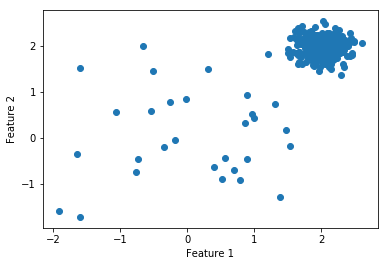

In [7]:

# Visualising the dataset 
# create a meshgrid 
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), 
                     np.linspace(-10, 10, 200)) 
  
# scatter plot 
plt.scatter(f1, f2) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 


In [8]:

# Training the classifier 
clf = KNN(contamination = outlier_fraction) 
clf.fit(X_train, y_train) 
  
# You can print this to see all the prediciton scores 
scores_pred = clf.decision_function(X_train)*-1
  
y_pred = clf.predict(X_train) 
n_errors = (y_pred != y_train).sum() 
# Counting the number of errors 
  
print('The number of prediciton errors are ' + str(n_errors)) 


The number of prediciton errors are 0


/usr/local/lib/python3.6/dist-packages/pyod/models/base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


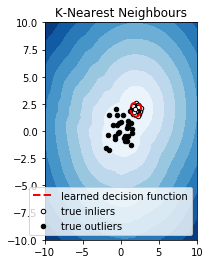

In [9]:

# threshold value to consider a 
# datapoint inlier or outlier 
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction) 
  
# decision function calculates the raw  
# anomaly score for every point 
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape) 
  
# fill blue colormap from minimum anomaly 
# score to threshold value 
subplot = plt.subplot(1, 2, 1) 
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(),  
                  threshold, 10), cmap = plt.cm.Blues_r) 
  
# draw red contour line where anomaly  
# score is equal to threshold 
a = subplot.contour(xx, yy, Z, levels =[threshold], 
                     linewidths = 2, colors ='red') 
  
# fill orange contour lines where range of anomaly 
# score is from threshold to maximum anomaly score 
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange') 
  
# scatter plot of inliers with white dots 
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], 
                                    c ='white', s = 20, edgecolor ='k')  
  
# scatter plot of outliers with black dots 
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],  
                                    c ='black', s = 20, edgecolor ='k') 
subplot.axis('tight') 
  
subplot.legend( 
    [a.collections[0], b, c], 
    ['learned decision function', 'true inliers', 'true outliers'], 
    prop = matplotlib.font_manager.FontProperties(size = 10), 
    loc ='lower right') 
  
subplot.set_title('K-Nearest Neighbours') 
subplot.set_xlim((-10, 10)) 
subplot.set_ylim((-10, 10)) 
plt.show()  
